# Problem Statement

 In this study I will be investigating data about total liquor sales in the state of Iowa in order to determine if the state should create a tax on liquor. The liquor sale data from the fiscal year of 2015 will be used to predict what the total revenue of liquor sales will be in 2016. With this information we can determine how much extra money in taxes the state could potentially earn if a small tax was place on liquor. Currently Iowa does not have a tax on liquor other than basic sales tax. I believe implementing a small liquor tax would increase state revenue without detering people from still buying liquor. The extra money generated by this tax can be used to help improve schools and infrastructure in the state. 

Linear models will be created in order to predict the future sales of 2016. Currently we have the data for the sales of the first 2016. If we compare this data to the sales data of 2015, we will be able to make a good prediction about liquor sales for the year 2016. Then we can figure out how much money in potential tax dollars the State of Iowa could earn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from scipy.special import erf

%matplotlib inline

In [2]:
# import the csv file
iowa_csv = 'file:///Users/Andrew/Downloads/iowa_liquor_sales_sample_10pct.csv'

In [3]:
iowa = pd.read_csv(iowa_csv)
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
iowa.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [5]:
iowa.shape

(270955, 18)

In [6]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
# Rename all the columns to make them easier to work with.

iowa.rename(columns={'Store Number':'store_number','Zip Code':'zip_code','County Number':'county_number','Category Name':'category_name',
                    'Vendor Number':'vendor_number','Item Number':'item_number','Item Description':'item_desc',
                    'Bottle Volume (ml)':'bottle_vol_ml','State Bottle Cost':'state_bottle_cost',
                    'State Bottle Retail':'state_bottle_retail','Bottles Sold':'bottles_sold',
                    'Sale (Dollars)':'sale_dollars','Volume Sold (Liters)':'volume_sold_lt',
                    'Volume Sold (Gallons)':'volume_sold_gal'}, inplace=True)

In [8]:
# format date in order to split data frame later on.

iowa["Date"] = pd.to_datetime(iowa["Date"], errors='raise', format="%m/%d/%Y")
iowa

,Date,store_number,City,zip_code,county_number,County,Category,category_name,vendor_number,item_number,item_desc,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_lt,volume_sold_gal
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [9]:
# remove '$' sign from the three columns with them to change them from objects to floats.

iowa['state_bottle_cost'] = iowa['state_bottle_cost'].str.replace('$', '').astype('float64')
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].str.replace('$', '').astype('float64')
iowa['sale_dollars'] = iowa['sale_dollars'].str.replace('$', '').astype('float64')

In [11]:
# Filtering out-liers out of the dataframe. 

for col in ['bottle_vol_ml', 'bottles_sold', 'sale_dollars', 'volume_sold_lt',
            'state_bottle_retail', 'state_bottle_cost']:    
    df = iowa[(iowa[col] < np.mean(iowa[col]) + 3 * np.std(iowa[col]))
              & (iowa[col] > np.mean(iowa[col]) - 3 * np.std(iowa[col]))]

In [12]:
df.head()

,Date,store_number,City,zip_code,county_number,County,Category,category_name,vendor_number,item_number,item_desc,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_lt,volume_sold_gal
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [ ]:
# Drop any missing values. 
df.dropna(inplace=True)

In [13]:
df.shape

(267878, 18)

In [14]:
df.dtypes

Date                   datetime64[ns]
store_number                    int64
City                           object
zip_code                       object
county_number                 float64
County                         object
Category                      float64
category_name                  object
vendor_number                   int64
item_number                     int64
item_desc                      object
bottle_vol_ml                   int64
state_bottle_cost             float64
state_bottle_retail           float64
bottles_sold                    int64
sale_dollars                  float64
volume_sold_lt                float64
volume_sold_gal               float64
dtype: object

In [17]:
# create a new column with labeled bottle volume.

df.loc[df.bottle_vol_ml == 750, 'consolidated_bottle_ml'] = '750ml'
df.loc[df.bottle_vol_ml == 1000, 'consolidated_bottle_ml'] = '1000ml'
df.loc[df.bottle_vol_ml == 1750, 'consolidated_bottle_ml'] = '1750ml'
df.head()

/Users/Andrew/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date,store_number,City,zip_code,county_number,County,Category,category_name,vendor_number,item_number,item_desc,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_lt,volume_sold_gal,consolidated_bottle_ml
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,750ml
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,750ml
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,1000ml
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,1750ml
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,1750ml


In [19]:
# change NaN values in new column with "Other_ml

df['consolidated_bottle_ml'].fillna('Other_ml', inplace=True)

/Users/Andrew/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
# create a column for net profit. 
df['net_profit'] = (df['state_bottle_retail'] - df['state_bottle_cost']) * df['bottles_sold']

/Users/Andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# Split data frame into two different df's based on year. 

df_2015 = df[df['Date'].dt.year==2015]
df_2016 = df[df['Date'].dt.year==2016]

In [23]:
df_2015.shape, df_2016.shape

((216099, 20), (51779, 20))

In [27]:
df_2015 = df.sort_values('store_number')
df_2016 = df.sort_values('store_number')

In [28]:
# create a column for sales from January through March for 2016.
df_2016['sales_jan_mar'] = [y if ((x.month >=1) & (x.month <=3)) else 0.0 for x, y in zip(df['Date'],df['sale_dollars'])]

In [29]:
# Group sums of columns to be graphed.

df_top_cat_2015=df.groupby(df_2015.category_name,as_index=False).agg({
        "sale_dollars": np.sum,
        "category_name": lambda x: x.iloc[0]
                }).sort_values(by='sale_dollars', ascending=False)

In [30]:
# create a column for sales from January through March for 2015.
df_2015['sales_jan_mar']=[y if ((x.month >=1) & (x.month <=3)) else 0.0 for x, y in zip(df['Date'],df['sale_dollars'])]

In [31]:
# Group data by store name(number)

sales_2015 = df_2015.groupby(by=["store_number"], as_index=False)

In [32]:
# get sums of all the columns needed. 

sales_2015 = sales_2015.agg({'sale_dollars': [np.sum],
                   'volume_sold_lt': [np.sum],
                   'net_profit': [np.sum],
                   'state_bottle_cost': [np.sum],
                   'state_bottle_retail': [np.sum],
                   'bottles_sold': [np.sum],
                   'sales_jan_mar': [np.sum]})

In [33]:
sales_2015.head()

,store_number,sale_dollars,volume_sold_lt,net_profit,state_bottle_cost,state_bottle_retail,bottles_sold,sales_jan_mar
,,sum,sum,sum,sum,sum,sum,sum
0,2106,174332.60,11825.60,58188.57,6230.99,9354.41,12555,35388.66
1,2113,11325.72,836.10,3785.73,1960.62,2942.86,829,7985.91
2,2130,139727.54,8448.27,46613.49,5099.22,7651.68,9156,21337.01
3,2152,9097.51,773.50,3048.97,1461.46,2198.51,709,5781.07
4,2178,29860.72,2436.17,10017.14,2799.30,4205.54,2407,11385.33


In [37]:
# create an X data set to be used later, while fixing column names. 

X = sales_2015['volume_sold_lt'].rename(columns={'sum':'volume_sold_sum'})
X['net_profit'] = sales_2015['net_profit']
X['state_bottle_cost'] = sales_2015['state_bottle_cost'].rename(columns={'sum':'state_bottle_cost_sum'})
X['state_bottle_retail'] = sales_2015['state_bottle_retail']
X['bottles_sold'] = sales_2015['bottles_sold']
X['sales_jan_mar'] = sales_2015['sales_jan_mar']
X['store_number'] = sales_2015['store_number']
X.head()

,volume_sold_sum,net_profit,state_bottle_cost,state_bottle_retail,bottles_sold,sales_jan_mar,store_number
0,11825.60,58188.57,6230.99,9354.41,12555,35388.66,2106
1,836.10,3785.73,1960.62,2942.86,829,7985.91,2113
2,8448.27,46613.49,5099.22,7651.68,9156,21337.01,2130
3,773.50,3048.97,1461.46,2198.51,709,5781.07,2152
4,2436.17,10017.14,2799.30,4205.54,2407,11385.33,2178


In [35]:
# create my y variable.

y = sales_2015[['store_number']].rename(columns={'sum':'store_number'})
y['sale_dollars'] = sales_2015['sale_dollars']

y.head()

,store_number,sale_dollars
,,
0,2106,174332.60
1,2113,11325.72
2,2130,139727.54
3,2152,9097.51
4,2178,29860.72


In [36]:
# create my X variable

X = sales_2015[['store_number','sales_jan_mar', 'volume_sold_lt', 'net_profit', 
                'state_bottle_cost', 'state_bottle_retail', 'bottles_sold']]
X.head()

,store_number,sales_jan_mar,volume_sold_lt,net_profit,state_bottle_cost,state_bottle_retail,bottles_sold
,,sum,sum,sum,sum,sum,sum
0,2106,35388.66,11825.60,58188.57,6230.99,9354.41,12555
1,2113,7985.91,836.10,3785.73,1960.62,2942.86,829
2,2130,21337.01,8448.27,46613.49,5099.22,7651.68,9156
3,2152,5781.07,773.50,3048.97,1461.46,2198.51,709
4,2178,11385.33,2436.17,10017.14,2799.30,4205.54,2407


In [38]:
sales_2016 = df_2016.groupby(by=["store_number"], as_index=False)

In [39]:
sales_2016 = sales_2016.agg({'sale_dollars': [np.sum, np.mean],
                   'volume_sold_lt': [np.sum, np.mean],
                   'net_profit': [np.sum, np.mean],
                   'state_bottle_cost': [np.sum, np.mean],
                   'state_bottle_retail': [np.sum, np.mean],
                   'bottles_sold': [np.sum, np.mean]})

In [40]:
sales_2016.head()

store_number sale_dollars             volume_sold_lt            net_profit  \
                        sum        mean            sum       mean        sum   
0         2106    174332.60  270.702795       11825.60  18.362733   58188.57   
1         2113     11325.72   61.889180         836.10   4.568852    3785.73   
2         2130    139727.54  274.513831        8448.27  16.597780   46613.49   
3         2152      9097.51   53.201813         773.50   4.523392    3048.97   
4         2178     29860.72  101.567075        2436.17   8.286293   10017.14   

             state_bottle_cost            state_bottle_retail             \
        mean               sum       mean                 sum       mean   
0  90.354922           6230.99   9.675450             9354.41  14.525481   
1  20.687049           1960.62  10.713770             2942.86  16.081202   
2  91.578566           5099.22  10.018114             7651.68  15.032770   
3  17.830234           1461.46   8.546550             2198.51  12.856784   
4  34.071905           2799.30   9.521429             4205.54  14.304558   

  bottles_sold             
           sum       mean  
0        12555  19.495342  
1          829   4.530055  
2         9156  17.988212  
3          709   4.146199  
4         2407   8.187075

Text(0.5,1,'Bottles Sold x Sales $')

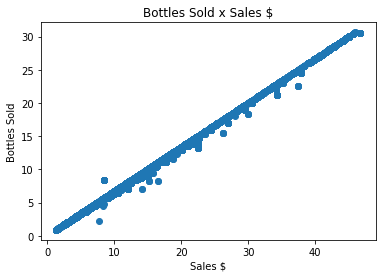

In [44]:
plt.scatter(df_2015['state_bottle_retail'], df_2015['state_bottle_cost'])

plt.xlabel('Sales $');
plt.ylabel('Bottles Sold');
plt.title('Bottles Sold x Sales $')

In [45]:
a = df_2015.sales_jan_mar.sum()
a

12292168.080000965

In [46]:
b = df_2016.sale_dollars.sum()
b

34097063.51999809

In [47]:
diff= (b-a)

diff

21804895.43999712

In [48]:
percent = (a/b)
percent

0.3605051817084351

In [50]:
df_2015['sales_jan_mar']=[y if ((x.month >=1) & (x.month <=3)) else 0.0 for x, y in zip(df['Date'],df['sale_dollars'])]

In [54]:
# Find the top selling types of liquor. 

df_top_categories_2015 = df.groupby(df_2015.category_name,as_index=False).agg({
        'sale_dollars': np.sum,
        'category_name': lambda x: x.iloc[0]
                }).sort_values(by='sale_dollars', ascending=False)

[Text(0,0.5,'Type of Liquor'),
 Text(0.5,0,'Sales UDS ($)'),
 Text(0.5,1,'Top Selling Liquors 2015')]

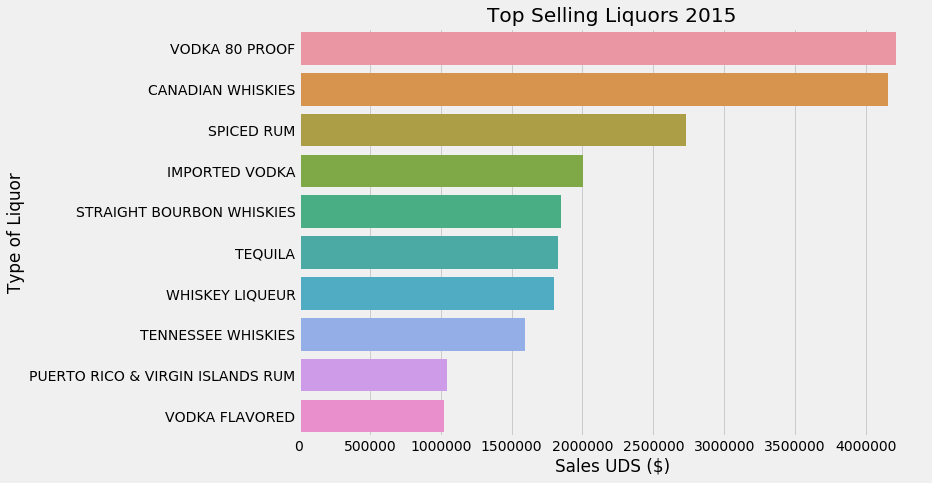

In [56]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x = 'sale_dollars', y = 'category_name', data = df_top_categories_2015.head(10))
ax.set(ylabel='Type of Liquor', 
       xlabel='Sales UDS ($)', 
       title='Top Selling Liquors 2015')

In [57]:
# find highest profit margin by bottle size.

df_top_profit_2015 = df.groupby(df_2015.category_name,as_index=False).agg({
        'net_profit': np.sum,
        'consolidated_bottle_ml': lambda x: x.iloc[0]
                }).sort_values(by='net_profit', ascending=False)

[Text(0,0.5,'Bottle Size (mL)'),
 Text(0.5,0,'Net Profit ($)'),
 Text(0.5,1,'Top Profit Margins 2015')]

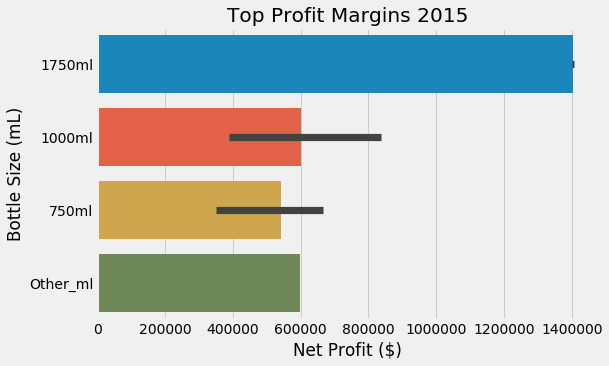

In [58]:
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x = 'net_profit', y = 'consolidated_bottle_ml', data = df_top_profit_2015.head(10))
ax.set(ylabel='Bottle Size (mL)', 
       xlabel='Net Profit ($)', 
       title='Top Profit Margins 2015')

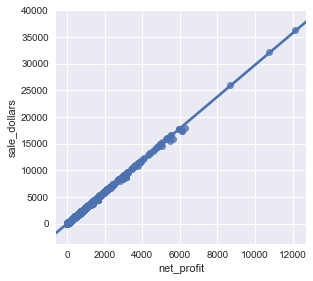

In [59]:
sns.set(color_codes=True)
for column in ['net_profit']:
    plt.figure(figsize=(4,4))
    sns.regplot(x=column, y='sale_dollars', data=df_2015)

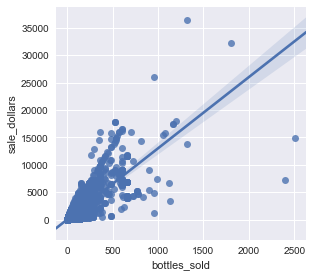

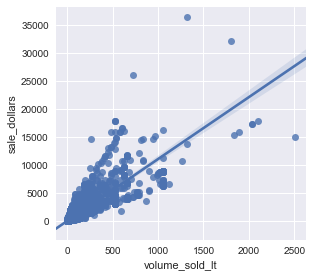

In [61]:
sns.set(color_codes=True)
for column in ['bottles_sold','volume_sold_lt']:
    plt.figure(figsize=(4,4))
    sns.regplot(x=column, y='sale_dollars', data=df_2015)

# Create Some Models

In [62]:
from sklearn import linear_model
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
lm = linear_model.LinearRegression()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5)
print('Cross-validated scores:', scores.mean())

Cross-validated scores: 0.9999885976555467


In [66]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9999946764030134

In [67]:
y_pred = lr.predict(X_test)

In [68]:
# calculate RMSE

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

60.480774070258555


In [69]:
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

60.48077406548601


In [70]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2815.543487430163


In [71]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [72]:
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [73]:
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1633.946726644581


In [74]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[[-2.05468098e-04  1.11529427e-05 -0.00000000e+00 -0.00000000e+00
   1.31296355e-04 -0.00000000e+00  9.99914483e-01]
 [-9.22063150e-02  3.01402961e+00  4.67086179e-02 -2.45312504e-02
  -3.60561792e-03 -2.37005443e-03  2.39685141e-02]]


In [75]:
# calculate RMSE (for alpha=0.001)
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

61.03812850940097


In [76]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  9.99605196e-01]
 [-8.17995251e-02  3.01123328e+00  8.32230070e-03  0.00000000e+00
   9.20321294e-04 -2.15972729e-03  2.52094501e-02]]


In [77]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

61.32500161319103


In [78]:
predictions = lr.predict(X_test)

In [80]:
predictions

array([[3.72200000e+03, 4.30045016e+04],
       [2.53800000e+03, 6.81295683e+04],
       [4.84400000e+03, 2.20923822e+03],
       [5.19100000e+03, 4.57377967e+02],
       [5.23400000e+03, 5.14826583e+02],
       [4.32600000e+03, 5.42564899e+03],
       [5.08600000e+03, 8.30257116e+03],
       [4.24700000e+03, 1.41129548e+04],
       [3.96800000e+03, 5.58301962e+03],
       [4.63400000e+03, 4.99323070e+03],
       [4.39600000e+03, 3.56318608e+03],
       [2.50900000e+03, 5.91999405e+04],
       [3.91200000e+03, 1.76847577e+04],
       [2.55800000e+03, 9.78644182e+04],
       [4.79100000e+03, 2.78337971e+03],
       [4.99300000e+03, 1.19466000e+04],
       [4.21400000e+03, 2.87946073e+04],
       [2.62300000e+03, 1.17416625e+05],
       [4.69200000e+03, 2.47060860e+03],
       [4.76500000e+03, 2.59063718e+03],
       [5.07300000e+03, 9.22195348e+03],
       [3.67800000e+03, 1.93106899e+04],
       [4.50800000e+03, 2.87401169e+03],
       [3.44700000e+03, 2.51568910e+05],
       [3.943000

# Presentation

In [ ]:
Presentation:

https://docs.google.com/presentation/d/1XHIZjRBZu-u2tOOpH9cECmVPLyFc7PT59l7CZbfzahQ/edit?usp=sharing